# Descriptors QSAR for toxicity ===> pLD50


**Feature selection**
-------------------------------------------------------------

**Pearson correlation coefficient**

**Mutual info regression**

**Recursive feature elimination with cross-validation to select features**


In [ ]:
import sklearn

### descriptors "aquat_tox_final.csv"

In [ ]:
# load excel dataframe
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving aquat_tox_final.csv to aquat_tox_final.csv


In [ ]:
# matriz
data

,SMILES,pLD50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1(C)[C@@H](/C=C(\Cl)C(F)(F)F)[C@H]1C(=O)O[C@...,4.455932,13.645096,13.645096,0.905788,-5.749409,0.469388,36.677419,449.856,430.704,...,0,0,0,0,0,0,0,0,0,0
1,CCOP(=S)(OCC)SCSC(C)(C)C,2.397940,8.122459,8.122459,0.641736,-5.186635,0.505229,40.933333,288.440,267.272,...,1,0,0,0,0,0,0,0,0,0
2,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.119186,12.014988,9.512798,5.050126,-12.014988,0.127319,54.666667,596.117,541.685,...,0,0,0,0,0,0,0,0,0,0
3,O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1,1.677781,12.556250,12.556250,0.483522,-5.386803,0.863695,16.666667,358.703,348.623,...,0,0,0,0,0,0,0,0,0,1
4,CCOP(=S)(CC)Sc1ccccc1,1.552842,7.956039,7.956039,0.061528,-4.774436,0.722425,34.428571,246.337,231.217,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,CCC(CC)c1cccc(OC(=O)NC)c1,1.337242,12.039495,12.039495,0.721095,-4.180552,0.846674,32.375000,221.300,202.148,...,0,0,0,0,0,0,0,0,0,0
2095,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,-0.295787,13.399967,13.399967,0.940717,-5.443663,0.851796,28.181818,309.331,291.187,...,0,0,0,0,0,0,0,0,0,0
2096,Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1,-1.994317,13.129906,13.129906,0.564460,-4.259278,0.869110,37.600000,275.308,258.172,...,0,0,0,0,0,0,0,0,0,0
2097,C1COCO1,-4.000000,6.848958,6.848958,2.687500,-2.739583,0.402086,72.000000,74.079,68.031,...,0,0,0,0,0,0,0,0,0,0


Remove rows with null values in 'num'

In [ ]:
# Remove rows with null values in 'num'
df_remove = data.loc[data['SMILES'].isnull()]
data2 = data.drop(df_remove.index)

# Convert non-numeric values to NaN
for col in data2.columns:
    data2[col] = pd.to_numeric(data2[col], errors='coerce')

# Drop columns with a high percentage of missing values (e.g., > 50%)
threshold = 0.5 * len(data2)
data2 = data2.dropna(axis=1, thresh=threshold)

# Drop rows with any NaN values
data2 = data2.dropna(axis=0)


print(f"Number of rows after removing rows with null 'num' and columns with too many missing values: {len(data2)}")
print(f"Number of columns after removing columns with too many missing values: {len(data2.columns)}")

Number of rows after removing rows with null 'num' and columns with too many missing values: 2094
Number of columns after removing columns with too many missing values: 218


In [ ]:
 X = data2.drop(['pLD50'], axis=1)

In [ ]:
print(X.shape)
saida = data2['pLD50']   #separando a saida do modelo dos dados originais

(2094, 217)


In [ ]:
# autoscaling input matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)

# Drop rows with any missing values in X before scaling
X_cleaned = X.dropna()

# Also drop the corresponding rows from saida to keep indices aligned
saida_cleaned = saida.loc[X_cleaned.index]

# Fit and transform the cleaned data
X2 = pd.DataFrame(scaler.fit_transform(X_cleaned), index=X_cleaned.index, columns=X_cleaned.columns) # Preserve original index and column names

In [ ]:
X2

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.153396,1.153396,-0.028287,-1.305484,-0.490026,0.162723,1.624688,1.640110,1.627240,1.713331,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
1,-1.025084,-1.025084,-0.322280,-0.952970,-0.281234,0.386004,0.316576,0.267237,0.318700,0.098594,...,4.077504,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
3,0.723886,0.723886,-0.498434,-1.078352,1.806993,-0.887120,0.885986,0.950607,0.887342,0.882895,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,4.288604
4,-1.090731,-1.090731,-0.968278,-0.694774,0.984032,0.044739,-0.024625,-0.035635,-0.022652,-0.224353,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
5,0.818690,0.818690,0.951365,-0.909350,-2.390425,-0.090744,0.932139,0.879902,0.937149,1.251977,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,0.520045,0.520045,-0.233923,-0.322774,1.707836,-0.062999,-0.227525,-0.279822,-0.224866,0.006323,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
2095,1.056701,1.056701,0.010602,-1.113969,1.737678,-0.282990,0.485877,0.468129,0.490050,0.698353,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
2096,0.950172,0.950172,-0.408318,-0.372086,1.838540,0.211125,0.210155,0.190794,0.213751,0.421541,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597
2097,-1.527434,-1.527434,1.955453,0.579829,-0.882090,2.015883,-1.420601,-1.406442,-1.420053,-1.331601,...,-0.202342,-0.175008,-0.103406,-0.109122,-0.03092,-0.103406,-0.036446,-0.084941,0.0,-0.219597


# Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Choose the number of top features you want to select
k = 108 # You can change this number based on your needs

# Create a SelectKBest object with the desired scoring function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data to select the top k features
X_new = selector.fit_transform(X2, saida_cleaned)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X2.columns[selected_features_indices]

print("Original number of features:", X2.shape[1])
print("Number of selected features:", X_new.shape[1])
print("Names of selected features:", selected_features_names)

Original number of features: 217
Number of selected features: 108
Names of selected features: Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'SPS',
       'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'MaxPartialCharge', 'MinPartialCharge',
       ...
       'fr_oxazole', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_piperzine',
       'fr_priamide', 'fr_pyridine', 'fr_quatN', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiocyan'],
      dtype='object', length=108)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 69  82 167 169 170 185 192 204 215] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Define the filename for the output
output_filename_features = "selected_features_names.txt"

# Open the file in write mode and write each feature name on a new line
with open(output_filename_features, "w") as f:
    for feature_name in selected_features_names:
        f.write(f"{feature_name}\n")

print(f"Selected feature names have been saved to {output_filename_features}")

Selected feature names have been saved to selected_features_names.txt


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, saida_cleaned, test_size=0.25, random_state=13)

#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=13)

# Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

modelo = ExtraTreesRegressor(n_estimators=200,  min_samples_split=3, min_samples_leaf=2,
                          max_features=0.9, random_state=13).fit(X_train, y_train)

In [ ]:
# prediction values

ypred = modelo.predict(X_test)

ypredc = modelo.predict(X_train)


# Avaliation metrics

In [ ]:
from sklearn.metrics import mean_squared_error
import math

mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msec = mean_squared_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

The mean squared error (MSE) on test set: 0.9739
The root mean squared error (RMSE) on test set: 0.9869


The mean squared error (MSE) on training set: 0.0428
The root mean squared error (RMSE) on training set: 0.2068


In [ ]:
from sklearn.metrics import mean_absolute_error

maet = mean_absolute_error(y_test, ypred)
print("The mean absolute error (MAE) on test set: {:.4f}".format(maet))
maec = mean_absolute_error(y_train, ypredc)
print('\n')
print("The mean absolute error (MAE) on training set: {:.4f}".format(maec))



The mean absolute error (MAE) on test set: 0.7120


The mean absolute error (MAE) on training set: 0.1184




In [ ]:
from sklearn.metrics import r2_score

# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 (teste): ', test_r2)

# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 (calibração): ', cal_r2)

# avaliação do conj validação
#val_r2 = r2_score(y_validation, ypredv)
#print('Reg linear coef R2 (validação): ', val_r2)

Reg linear coef R2 (teste):  0.6035921392948218
Reg linear coef R2 (calibração):  0.9794917190904553


Text(0.5, 0, 'y real')

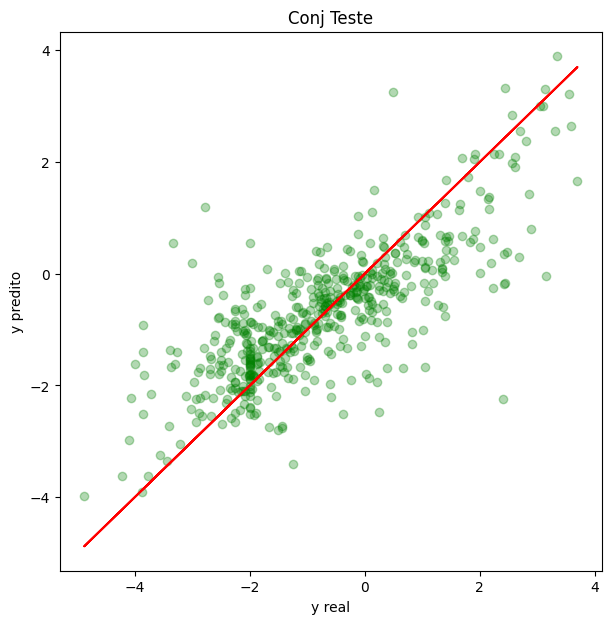

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=ypred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Teste')
plt.ylabel('y predito')
plt.xlabel('y real')

Text(0.5, 0, 'y real')

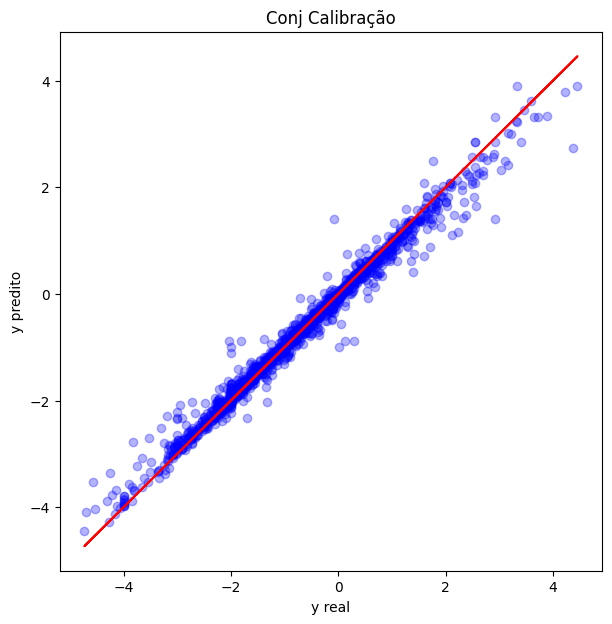

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=ypredc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Calibração')
plt.ylabel('y predito')
plt.xlabel('y real')

# **# Feature importance**

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on validation data
result = permutation_importance(
    modelo, X_test, y_test,          # procedimento testado com os conjunto X_test e y_test
    n_repeats=20,              # how many times to permute
    random_state=42,
    scoring='r2'               # R2 score
)


MolLogP - Feature 73 - Importance: 0.0762
BCUT2D_LOGPHI - Feature 18 - Importance: 0.0190
PEOE_VSA6 - Feature 40 - Importance: 0.0164
fr_COO - Feature 77 - Importance: 0.0161
FractionCSP3 - Feature 63 - Importance: 0.0156
fr_COO2 - Feature 78 - Importance: 0.0143
SlogP_VSA12 - Feature 47 - Importance: 0.0101
EState_VSA9 - Feature 59 - Importance: 0.0080
fr_allylic_oxid - Feature 82 - Importance: 0.0063
BCUT2D_CHGHI - Feature 16 - Importance: 0.0061
SlogP_VSA4 - Feature 49 - Importance: 0.0060
SMR_VSA7 - Feature 44 - Importance: 0.0053
fr_halogen - Feature 90 - Importance: 0.0050
MinAbsEStateIndex - Feature 2 - Importance: 0.0045
NOCount - Feature 65 - Importance: 0.0043
fr_nitro_arom - Feature 96 - Importance: 0.0038
Chi2v - Feature 29 - Importance: 0.0038
fr_bicyclic - Feature 86 - Importance: 0.0035
BCUT2D_LOGPLOW - Feature 19 - Importance: 0.0032
SMR_VSA9 - Feature 45 - Importance: 0.0031
Chi4v - Feature 33 - Importance: 0.0029
Phi - Feature 71 - Importance: 0.0028
fr_aldehyde - Fea

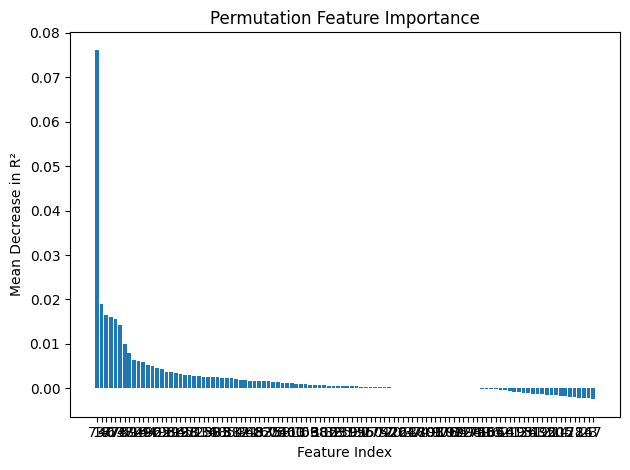

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Print top features
for idx in sorted_idx:
    print(f"{selected_features_names[idx]} - Feature {idx} - Importance: {result.importances_mean[idx]:.4f}")


# Calculate and print the sum of all feature importances
total_importance = np.sum(result.importances_mean)
print(f"\nSum of all feature importances: {total_importance:.4f}")


# Optional: plot
# Use the number of selected features for the x-axis range
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx])
# Use the sorted indices themselves as labels for the x-axis ticks
plt.xticks(ticks=range(len(sorted_idx)), labels=sorted_idx)
plt.xlabel("Feature Index")
plt.ylabel("Mean Decrease in R²")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.feature_selection import r_regression

pcc = r_regression(X_test, y_test)  #Pearson correlation coefficient for each feature and the target
pcc

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


array([ 9.42375522e-02,  9.42375522e-02, -2.05047866e-01,  1.53223786e-02,
        4.04531220e-01,  4.07578472e-01,  4.02896448e-01,  3.14427130e-01,
        5.86765046e-02,  7.78255137e-02, -6.76844694e-02,  4.48198366e-02,
       -3.13260576e-01, -2.83311914e-01, -2.17644382e-01,  1.64038382e-01,
        3.22916383e-01, -2.27896928e-01,  4.34434932e-01, -9.08134071e-02,
        1.59204344e-01, -3.23351799e-02,  3.18606010e-01, -2.19918653e-01,
        2.54490199e-01,  4.21924433e-01,  2.52313596e-01,  4.04182103e-01,
        3.41727365e-01,  4.38146887e-01,  3.45326653e-01,  4.62370546e-01,
        3.27032950e-01,  4.40327252e-01,  3.24229439e-02,  3.66334722e-01,
       -2.08290146e-02,  3.64188099e-01,  5.58781348e-02, -4.01983287e-02,
        4.45392526e-01,  1.98681915e-01,  3.97955065e-01, -1.16180150e-01,
        2.95362268e-01,  1.66371334e-01,  1.43523382e-01,  4.31937143e-01,
        1.03792458e-01,  2.11775282e-01,  2.37679141e-01,  2.39640359e-01,
       -3.55430018e-03,  

In [ ]:
# Import necessary libraries
import numpy as np

# Define the filename
output_filename = "pcc_values.txt"

# Open the file in write mode and write the pcc values
with open(output_filename, "w") as f:
    # Assuming pcc is a numpy array, you can iterate and write each value
    for value in pcc:
        f.write(f"{value}\n")


In [ ]:
from sklearn.feature_selection import mutual_info_regression

mu = mutual_info_regression(X_test, y_test) #Estimate mutual information for a continuous target variable
print(mu)

[1.05461374e-01 1.05383186e-01 4.79248099e-02 9.47065650e-02
 2.51767222e-01 1.75790980e-01 2.52767964e-01 1.45240088e-01
 1.07239933e-01 4.16843046e-02 4.84098700e-02 6.32396524e-02
 1.05971787e-01 1.38206024e-02 5.46217772e-02 5.02099201e-02
 7.87052309e-02 1.53296745e-01 2.11780534e-01 6.70243815e-02
 1.09105142e-01 3.47829097e-02 1.46059839e-01 1.00784657e-01
 1.07240320e-01 2.61210219e-01 1.44791599e-01 2.36459991e-01
 1.18924659e-01 2.38975496e-01 1.18994603e-01 2.51224034e-01
 1.73947810e-01 2.38068859e-01 1.13413037e-01 1.84323898e-01
 7.51148094e-03 1.62515894e-01 1.51965108e-02 0.00000000e+00
 1.81457136e-01 4.68861522e-02 1.36328832e-01 0.00000000e+00
 7.02929583e-02 5.96522854e-02 6.92610129e-02 1.48427102e-01
 1.17878739e-02 6.63356431e-02 1.49052311e-01 1.26388818e-01
 0.00000000e+00 0.00000000e+00 2.12801812e-02 0.00000000e+00
 3.91933568e-03 3.28106967e-03 5.29005501e-02 1.34982972e-01
 1.57609443e-01 3.38381760e-02 7.67600722e-02 6.10525666e-02
 1.38978002e-01 2.652304

In [ ]:
# Define the filename
output_filename = "mu_values.txt"

# Open the file in write mode and write  values
with open(output_filename, "w") as f:
    # Assuming pcc is a numpy array, you can iterate and write each value
    for value in mu:
        f.write(f"{value}\n")

In [ ]:
modelo.score(X_test, y_test)

0.6035921392948218

In [ ]:
from sklearn.feature_selection import RFECV
#Recursive feature elimination with cross-validation to select features.
selector = RFECV(modelo, cv=10)

selector = selector.fit(X_test, y_test)

selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  5,  1,  1,  1, 17,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1, 13,
        1,  1,  6,  1, 11,  1,  8,  9,  1,  7,  1,  1, 16, 15,  1,  1, 14,
        1,  1,  3,  2, 10, 12])

In [ ]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False, False, False, False])

In [ ]:
# Define the filename
output_filename = "crossvalind2.txt"

# Open the file in write mode and write the pcc values
with open(output_filename, "w") as f:
    # Assuming pcc is a numpy array, you can iterate and write each value
    for value in selector.support_:
        f.write(f"{value}\n")